In [130]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [131]:
%%cython

cimport cython

import numpy as np
cimport numpy as np

from libc.math cimport exp
from libc.stdlib cimport rand
cdef extern from "limits.h":
    int RAND_MAX


@cython.boundscheck(False)
@cython.wraparound(False)
def cy_ising_step(np.int64_t[:, :] field, float beta=0.4):
    cdef int N = field.shape[0]
    cdef int M = field.shape[1]
    cdef int n_offset, m_offset, n, m
    for n_offset in range(2):
        for m_offset in range(2):
            for n in range(n_offset, N, 2):
                for m in range(m_offset, M, 2):
                    _cy_ising_update(field, n, m, beta)

    return np.array(field)


@cython.boundscheck(False)
@cython.wraparound(False)
cpdef _cy_ising_update(np.int64_t[:, :] field, int n, int m, float beta):
    
    
    cdef:
        int total = 0
        int N = field.shape[0]
        int M = field.shape[1]
        int i, j
    
    for i in range(n-1, n+2):
        for j in range(m-1, m+2):
            if i == n and j == m:
                continue
            total += field[i % N, j % M]

    cdef float dE = 2 * field[n, m] * total

    if dE <= 0:
        field[n, m] *= -1

    elif exp(-dE * beta) * RAND_MAX > rand():
        field[n, m] *= -1

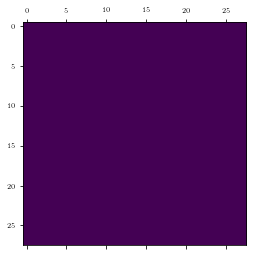

In [136]:
import matplotlib.pyplot as plt

def random_spin_field(N, M):
    return np.random.choice([-1, 1], size=(N, M))

def run_gibbs_sampling(field, beta=10, iternum=20):
    for i in range(iternum):
        field = cy_ising_step(field, beta=beta)
        
    return field

field = random_spin_field(28, 28)
f = run_gibbs_sampling(field, beta=0.9)

plt.matshow(f)
plt.show()

In [143]:
len_data = 70000
betas = np.arange(0, 1, 0.1)[::-1] # 10 betas (0.0, ..., 0.9)

x = []
y = []

for i in range(len_data // len(betas)):
    field = random_spin_field(28, 28)
    for j in range(len(betas)):
        f = run_gibbs_sampling(field, beta=betas[j])
        x.append(f.copy())
        y.append(j)

    xnp = np.stack(x)
    ynp = np.array(y)

    if i % 1000 == 0:
        np.savez('all-images-isingmnist.npz', xnp)
        np.savez('all-labels-isingmnist.npz', ynp)
        
    print("{} / {}".format(i+1, (len_data // len(betas))))

np.savez('train-images-isingmnist.npz', xnp[:60000])
np.savez('train-labels-isingmnist.npz', ynp[:60000])
np.savez('t10k-images-isingmnist.npz', xnp[60000:])
np.savez('t10k-labels-isingmnist.npz', ynp[60000:])

1 / 7000
2 / 7000
3 / 7000
4 / 7000
5 / 7000
6 / 7000
7 / 7000
8 / 7000
9 / 7000
10 / 7000
11 / 7000
12 / 7000
13 / 7000
14 / 7000
15 / 7000
16 / 7000
17 / 7000
18 / 7000
19 / 7000
20 / 7000
21 / 7000
22 / 7000
23 / 7000
24 / 7000
25 / 7000
26 / 7000
27 / 7000
28 / 7000
29 / 7000
30 / 7000
31 / 7000
32 / 7000
33 / 7000
34 / 7000
35 / 7000
36 / 7000
37 / 7000
38 / 7000
39 / 7000
40 / 7000
41 / 7000
42 / 7000
43 / 7000
44 / 7000
45 / 7000
46 / 7000
47 / 7000
48 / 7000
49 / 7000
50 / 7000
51 / 7000
52 / 7000
53 / 7000
54 / 7000
55 / 7000
56 / 7000
57 / 7000
58 / 7000
59 / 7000
60 / 7000
61 / 7000
62 / 7000
63 / 7000
64 / 7000
65 / 7000
66 / 7000
67 / 7000
68 / 7000
69 / 7000
70 / 7000
71 / 7000
72 / 7000
73 / 7000
74 / 7000
75 / 7000
76 / 7000
77 / 7000
78 / 7000
79 / 7000
80 / 7000
81 / 7000
82 / 7000
83 / 7000
84 / 7000
85 / 7000
86 / 7000
87 / 7000
88 / 7000
89 / 7000
90 / 7000
91 / 7000
92 / 7000
93 / 7000
94 / 7000
95 / 7000
96 / 7000
97 / 7000
98 / 7000
99 / 7000
100 / 7000
101 / 70